In [1]:
ls


sample_data/


In [2]:
cd /content/drive/MyDrive/CNN ASS

/content/drive/MyDrive/CNN ASS


In [3]:
ls

flowers/  Untitled0.ipynb


In [4]:
pwd

'/content/drive/MyDrive/CNN ASS'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [7]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [9]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN ASS/flowers/Training",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4181 images belonging to 5 classes.


In [11]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN ASS/flowers/Testing",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 396 images belonging to 5 classes.


In [12]:
#MODEL BUILDING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [13]:
model = Sequential()

In [14]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (64,64,3)))

In [15]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(300, activation='relu'))

In [18]:
model.add(Dense(300, activation='relu'))

In [19]:
model.add(Dense(300, activation='relu'))

In [20]:
model.add(Dense(5, activation="softmax"))

In [21]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

In [22]:
len(x_train)

175

In [23]:
model.fit(x_train, epochs = 10, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/10
175/175 [==============================] - 968s 6s/step - loss: 1.3125 - accuracy: 0.4602 - val_loss: 0.9873 - val_accuracy: 0.6136
Epoch 2/10
175/175 [==============================] - 43s 243ms/step - loss: 1.0881 - accuracy: 0.5590 - val_loss: 1.1309 - val_accuracy: 0.6162
Epoch 3/10
175/175 [==============================] - 43s 246ms/step - loss: 0.9973 - accuracy: 0.6085 - val_loss: 0.8423 - val_accuracy: 0.6793
Epoch 4/10
175/175 [==============================] - 43s 243ms/step - loss: 0.9676 - accuracy: 0.6183 - val_loss: 0.8232 - val_accuracy: 0.7197
Epoch 5/10
175/175 [==============================] - 43s 243ms/step - loss: 0.8885 - accuracy: 0.6534 - val_loss: 0.7422 - val_accuracy: 0.7399
Epoch 6/10
175/175 [==============================] - 43s 243ms/step - loss: 0.8641 - accuracy: 0.6652 - val_loss: 0.7974 - val_accuracy: 0.7374
Epoch 7/10
175/175 [==============================] - 42s 242ms/step - loss: 0.8307 - accuracy: 0.6805 - val_loss: 0.7565 - val_accu

In [24]:
model.save('flowers_prediction.h5')

Testing


In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
model = load_model('flowers_prediction.h5')

In [35]:
picture = image.load_img("/content/drive/MyDrive/CNN ASS/flowers/Testing/rose/102501987_3cdb8e5394_n.jpg",target_size=(64,64))

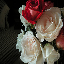

In [36]:
picture

In [30]:
img= image.img_to_array(picture)

In [31]:
img = np.expand_dims(img,axis = 0)

In [32]:
predict = model.predict(img)

In [33]:
labels =['daisy','dandelion','rose','sunflower','tulip']

In [34]:
np.argmax(predict)
labels[np.argmax(predict)]

'rose'